# MBA FIAP Inteligência Artificial & Machine Learning

## Visão Computacional: Análise de Imagens Médicas

## 1. Introdução

As tecnologias de imagens médicas estão cada vez mais integradas aos sitemas de visão computacional, incluindo as imagens de raio-x.

Modelos de equipamentos modernos geram imagens digitais deste tipo de exame, proporcionando análises mais completas e menos _ad-hoc_, com isso algumas pré-análises podem ser realizadas por aplicações baseadas em inteligência artificial para confirmar ou sugerir diagnósticos ao profissional responsável pelo exame.

No campo dos diagósticos por raios-x, a pnenumonia é uma das enfermidades onde seu uso é um dos mais aplicados para determinar o curso de tratamento.

<p align="center">
    <img src="imagens/NORMAL2-IM-1422-0001.jpeg">
</p>

## 2. Instruções

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas.

Por meio de uma trilha guiada, iremos constuir um modelo que seja capaz de classificar imagens de raio-x para determinar se a determinada pessoa está com alguma condição que necessita maiores cuidados.

De acordo com as imagens disponíveis para o treinamento e validação, será de critério do grupo selecionar as quantidades ideais ou até mesmo pré-processar as imagens para obter o melhor resultado, nos principais indicadores de performance, como precisão, sensibilidade e pontuação F1.

Este projeto poderá ser feita por grupos de até 4 pessoas.
Caso este projeto seja substitutivo, deverá ser realizado por apenas uma pessoa.

| Nome dos Integrantes     | RM            | Turma |
| :----------------------- | :------------ | :---: |
| Paulo Sérgio M. Gabriel  | RM 334096     | `8IA` |
| Rubens Cabral da Rocha   | RM 333208     | `8IA` |
| Giordano R. Todeschini   | RM 334808     | `8IA` |
| Walter F. Pita Filho     | RM 334944     | `8IA` |

Por ser um projeto guiado, fique atento quando houver as marcações **Implementação** indica que é necessário realizar alguma implementação em Python no bloco a seguir onde há a inscrição ```##IMPLEMENTAR``` e **Resposta** indica que é esperado uma resposta objetiva relacionado a algum questionamento. 

**Cada grupo pode utilizar nas respostas objetivas quaisquer itens necessários que enriqueçam seu ponto vista, como gráficos, fotos e, até mesmo, trechos de código-fonte.**

Pode-se utilizar quantos blocos forem necessários para realizar determinadas implementações ou utilizá-las para justificar as respostas. Não é obrigatório utilizar somente o bloco indicado.

Ao final não se esqueça de subir os arquivos do projeto nas contas do GitHub de cada membro, ou subir na do representante do grupo e os membros realizarem o fork do projeto.

A avaliação terá mais ênfase nos seguintes tópicos de desenvolvimento do projeto:
 
1. __Pré-Processamento__
2. __Classificação__
3. __Performance__
4. __Conclusões Finais__

## 3.1 Detalhe do problema: a pneunomia

Fonte: [artigo](https://drauziovarella.uol.com.br/doencas-e-sintomas/pneumonia) do Dr. Drauzio Varella.

Pneumonias são infecções que se instalam nos pulmões, órgãos duplos localizados um de cada lado da caixa torácica. Podem acometer a região dos alvéolos pulmonares onde desembocam as ramificações terminais dos brônquios e, às vezes, os interstícios (espaço entre um alvéolo e outro).

Basicamente, pneumonia é provocada pela penetração de um agente infeccioso ou irritante (bactérias, vírus, fungos e por reações alérgicas) no espaço alveolar, onde ocorre a troca gasosa. Esse local deve estar sempre muito limpo, livre de substâncias que possam impedir o contato do ar com o sangue.

Exame clínico, auscultação dos pulmões e radiografias de tórax são recursos essenciais para o diagnóstico de pneumonia.

<p align="center">
    <img src="imagens/pneumonia.jpeg">
</p>

## 3.2 Diagnóstico por raio-x

O exame de raio-x traz diferenças em cada tipo de diagnóstico, sendo considerado os seguintes grupos de análise: **normal** (ou controle) onde não há nenhuma condição de infeção, **bacterial pneumonia** (pneumonia bacteriana) que representa a condição de infecção bacteriana e **viral pneumonia** que indica a condição de infecção vira. 

<p align="center">
<img src="imagens/raiox.png" height="60%" width="60%">
</p>

As imagens de controle não são mais brancas ao centro que é onde fica o coração. Já nas imagens com pneumonia é possível notar regiões brancas ao redor dos pulmões, que é como o exame identifica as secreções responsáveis pela infeçcão.

Quando mais regiões brancas ao redor do pulmão mais severa é a inflamação e menos se observa dos detalhes dos pulmões, ficando um pouco esmaecido diante desta condição.

## 4.1 Problema

Construir um classificador utilizando _transfer learning_ para identificar as seguintes classes: **controle**, **pneumonia bacteriana** e **pneumonia viral**.

Para construir este classificador, utilize o dataset do [Kaggle Chest Ray Pneumonia](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia) e organize os dados de forma a separar em cada uma das classes que já estão definidas no diretório ```raiox```, sendo ```controle``` para as imagens normais (sem inflamação), ```bacteria``` para as imagens de pneumonia bacteriana e ```viral``` para as imagens de pneumonia viral.

Determine a quantidade de imagens a serem treinadas e validadas. Utiliza pelo menos, 100 imagens para cada classe.

Compare os resultados com pelo menos 3 classificadores, obtendo os valores de **precisão (precision)**, **sensibilidade (recall)** e **pontuação F1 (F1 Score)**. No guia abaixo, foi indicado os seguintes modelos: ResNet50, VGG16 e VGG19. 

>Importante: a escolha do número de imagens devem ser o suficiente para alcançar o valor de **precisão** mínima de 70%.

A construção do modelo será utilizada o framework Keras.

**Pergunta**: Qual o número de imagens que foram selecionadas para cada classe?

**Resposta**: 1583 de controle (normal, ou seja, sem pneumonia), 1493 de pneumonia viral e 2780 de pneumonia bacteriana.
#Observação: fizemos outras tentativas com menos imagens, porém o resultado não foi satisfatório, por isso então fomos au-
#mentando até chegar nesta quantidade e obtermos mais de 70% de precisão.

## 4.2 Componentes obrigatórios

Este projeto requer a instalação dos seguintes componentes, via ```conda install```:

* Keras
* Tensorflow
* Pillow
* Matplotlib

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.applications import VGG16, VGG19
from keras.applications import Xception
from keras.applications.xception import preprocess_input
from keras.applications.resnet50 import preprocess_input
from keras.applications.vgg16 import preprocess_input
from keras import Model, layers
from keras.models import load_model, model_from_json

import keras.backend as K

Using TensorFlow backend.
C:\Users\Infotecno\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Infotecno\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Infotecno\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Infotecno\anaconda3\lib\site-packages\tensorflow\python\fra

## 4.3 Carregando imagens de treinamento e validação

Selecione a melhor divisão entre dados de treinamento e validação. O número deverá ser representado em número fracionário, 5% equivale a 0.05, por exemplo.

In [2]:
## IMPLEMENTE
divisao_treino_validacao = 0.30

In [3]:
train_datagen = ImageDataGenerator(validation_split=divisao_treino_validacao)

train_generator = train_datagen.flow_from_directory(
    "raiox/",
    batch_size=32,
    class_mode="categorical",
    color_mode="rgb",
    target_size=(224,224),
    subset="training")

Found 4101 images belonging to 3 classes.


In [4]:
val_generator = train_datagen.flow_from_directory(
    "raiox/",
    batch_size=32,
    class_mode="categorical",
    color_mode="rgb",
    target_size=(224,224),
    subset="validation")

Found 1755 images belonging to 3 classes.


In [5]:
train_generator.class_indices, val_generator.class_indices

({'bacteria': 0, 'controle': 1, 'viral': 2},
 {'bacteria': 0, 'controle': 1, 'viral': 2})

## 4.4 Modelos de transfer learning

O Keras já possui classes especializadas para os seguintes modelos de deep-learning treinados com o conjunto de dados [ImageNet](http://www.image-net.org/):
  
* Xception
* VGG16
* VGG19
* ResNet50
* InceptionV3
* InceptionResNetV2
* MobileNet
* DenseNet
* NASNet
* MobileNetV2

Mais detalhes, veja na [documentação do Keras](https://keras.io/applications/).

Para este estudo, vamos utilizar para avaliação as seguintes arquiteturas: RestNet50, VGG15 e VGG19.

## 4.5 Indicadores de desempenho

O Keras não possui os indicadores de desempenho como precisão, sensibilidade e pontuação f1 por padrão, portanto precisamos implementar externamente.

In [6]:
def recall_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

### 4.5.1 Arquitetura ResNet50

**Pergunta**: Explique como é constituída a arquitetura do ResNet50? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**: ResNet, abreviação de Residual Networks é uma rede neural criada pela Microsoft e usada como espinha dorsal para muitas tarefas de visão de computador. 
Antes da ResNet, redes neurais muito profundas eram difíceis devido ao problema dos gradientes de desaparecimento. 
As Redes profundas são difíceis de treinar por causa deste problema (gradiente de desaparecimento): o gradiente é propagado de volta para camadas anteriores e então a multiplicação repetida pode tornar o gradiente extremamente pequeno. Como resultado, à medida que a rede se aprofunda, seu desempenho fica saturado ou começa a degradar rapidamente.
A ResNet introduziu pela primeira vez o conceito de conexão skip. 
Na ResNet empilhamos camadas de convolução como antes, mas agora também adicionamos a entrada original à saída do bloco de convolução. Isso é chamado de conexão skip, onde a rede aprende a função "identidade" que permite passar pelas entradas dos blocos sem passar pelas outras camadas de peso.

Quanto aos cenários de êxito, são os cenários de redes mais profundas e também com imagens que não precisem de tanto pré-processamento.
Como a ResNet tem como principal característica o uso de uma conexão residual para resolver o
problema da degradação, acreditamos que nas redes menos profundas, a precisão de resposta acabe não sendo tão boa, principalmente se as imagens não passarem por um bom pré-processamento.

No documento "Deep Residual Learning for Image Recognition" dos autores "Kaiming He", "Xiangyu Zhang", "Shaoqing Ren", "Jian Sun" de 10 de dezembro de 2015, da "Microsoft Research", encontramos uma imagem que representa o bloco residual com a função "identidade":
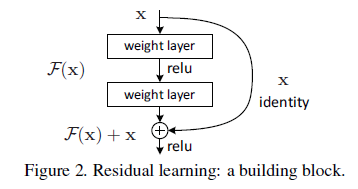

A técnica de transfer learning consiste de utilizar o mesmo modelo e treiná-lo para outas imagens. Por tal motivo, excluímos a última camada para modelar com as classes que definimos, ou seja, **controle**, **bacteriana** e **viral**.

Informe a quantidade de classes a serem classificadas.

In [7]:
## IMPLEMENTE

qtde_classes = 3

In [9]:
conv_base = ResNet50(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

C:\Users\Infotecno\anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [10]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
____________________________________________________________________________________________

In [11]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

O número de épocas define quantas vezes o modelo irá treinar e validar o erro, assim ajustando os pesos para melhor convergência.
Escolha o número adequado de épocas para alcançarmos pelo menos **70% de precisão de validação**.

In [8]:
## IMPLEMENTE

qtde_epocas = 10

In [13]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)


Epoch 1/10
5/5 [==============================] - 190s 38s/step - loss: 1.1215 - precision_score: 0.6122 - recall_score: 0.5312 - f1_score: 0.5655 - val_loss: 1.4171 - val_precision_score: 0.4001 - val_recall_score: 0.3000 - val_f1_score: 0.3405
Epoch 2/10
5/5 [==============================] - 179s 36s/step - loss: 0.7335 - precision_score: 0.7233 - recall_score: 0.6187 - f1_score: 0.6647 - val_loss: 1.0694 - val_precision_score: 0.5719 - val_recall_score: 0.4875 - val_f1_score: 0.5261
Epoch 3/10
5/5 [==============================] - 179s 36s/step - loss: 0.6876 - precision_score: 0.7123 - recall_score: 0.6625 - f1_score: 0.6859 - val_loss: 1.6060 - val_precision_score: 0.4352 - val_recall_score: 0.3938 - val_f1_score: 0.4133
Epoch 4/10
5/5 [==============================] - 180s 36s/step - loss: 0.7848 - precision_score: 0.7097 - recall_score: 0.6313 - f1_score: 0.6675 - val_loss: 0.9978 - val_precision_score: 0.5074 - val_recall_score: 0.3750 - val_f1_score: 0.4308
Epoch 5/10
5/5 

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

Observação: testamos inicialmente com aproximadamente 200 imagens por classe, mas a precisão não ficou tão boa; resolvemos
então aumentar pra 500 imagens e depois, pra 1000 imagens por classe e fomos variando a quanidade de
épocas até chegarmos a conclusão de que teríamos que colocar mais imagens; no final resolvemos colocar todas as imagens disponíveis. 
No início, com 200 imagens, testamos com 6 épocas, variando até 10.
Com 500 imagens chegamos a testar com menos épocas e depois fomos até 20.
Com 1000 imagens, como não estávamos conseguindo bons resultados, testamos com 30 épocas.
Agora no final, após colocarmos todas as imagens disponíveis, com 10 épocas já foi suficiente pra alcançarmos um bom resultado.

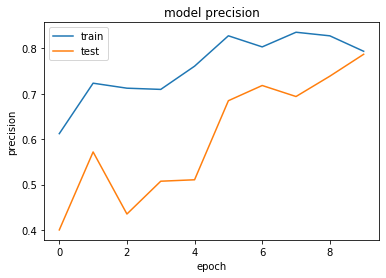

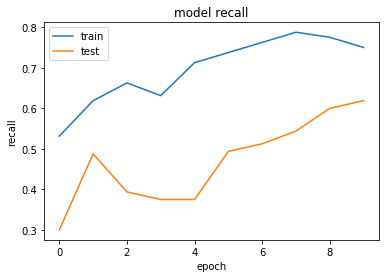

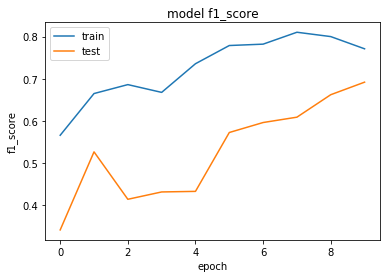

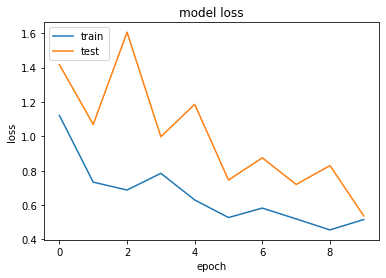

In [14]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**: Conforme íamos testando o modelo com menos imagens, o gráfico de "train" e "test" se mostravam um pouco divergentes entre si, o que nos obrigou a ir, aos poucos, aumentando a quantidade de imagens, até chegarmos nestes gráficos acima, onde, comparados aos anteriores gerados, estão bem mais convergentes. 
Reparamos que os dois gráficos ("train" e "test")assumem uma mesma direção [ascendente (precisão, sensibilidade e pontuação) e descendente (perda)] à medida que se aumentam o número de imagens.
Com relação à quantidade de épocas, pudemos reparar que mesmo aumentando, a precisão não subia pra mais de 70% quando a quantidade de imagens não era suficiente, pois chegamos a testar com 30 épocas e mesmo assim, não obtivemos a precisão que estamos tendo agora, nos gráficos acima.

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

**Resposta**:Os valores correspondentes a época 10 são: precisão (78,70%), sensibilidade (61,87%) e pontuação (69,18%)

### 4.5.2 Arquitetura VGG16

**Pergunta**: Explique como é constituída a arquitetura do VGG16? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**: Foi a primeira arquitetura a substituir os filtros maiores, ou seja, os filtros que exigem maior custo  computacional, por grandes sequências de filtros com tamanhos 3×3. 

Esta figura, mostra a macro arquitetura da VGG16
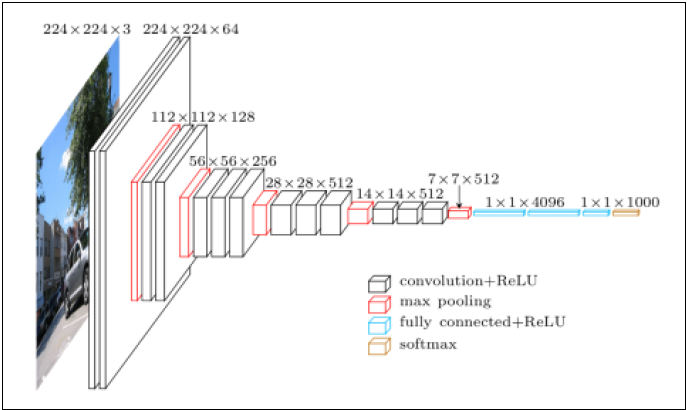

A arquitetura funciona assim:
Na pilha de convoluções são aplicados filtros, bem pequenos, 3X3 (que é o menor tamanho para capturar a noção de esquerda/direita, centro, e acima/abaixo).
A convolução é fixada em 1 pixel, dessa forma, o preenchimento espacial da camada de entrada de convolução, é de tal modo,
que a resolução espacial é preservada após a convolução.
A cada final da execução de uma pilha de convolução, é realizado a chamada camada de max-pooling.
A camada de max-pooling não é executada a todo final de UMA max-pooling, e sim, de um conjunto de convolução.
Assim, a camada de max-pooling é realizada por cinco vezes.
Max-pooling é executada em uma janela de 2X2.
Ao final das execuções anteriores, são acionadas 3 camadas de Fully-Connected (FC).
Os dois primeiros tem exatamente 4096 canais cada uma, mas a terceira possui 1000 canais (uma para cada classe).
Todas as camadas de FC são equipadas com comadas ocultas ReLU.
A camada final é uma camada de soft-max.
A configuração das camadas FC são as mesmas em toda a rede.

In [15]:
conv_base = VGG16(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

58892288/58889256 [==============================] - 64s 1us/step


In [16]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [17]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [27]:
#Implementamos uma nova célula aqui, pois alteramos a quantidade de épocas para 7, uma vez que com 10, 
#a precisão ficou abaixo dos 70%
qtde_epocas = 7 

In [26]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

Epoch 1/7
5/5 [==============================] - 253s 51s/step - loss: 0.6449 - precision_score: 0.7663 - recall_score: 0.7563 - f1_score: 0.7611 - val_loss: 0.6477 - val_precision_score: 0.6704 - val_recall_score: 0.6625 - val_f1_score: 0.6663
Epoch 2/7
5/5 [==============================] - 246s 49s/step - loss: 0.7371 - precision_score: 0.7378 - recall_score: 0.7188 - f1_score: 0.7279 - val_loss: 0.9769 - val_precision_score: 0.7192 - val_recall_score: 0.7063 - val_f1_score: 0.7126
Epoch 3/7
5/5 [==============================] - 247s 49s/step - loss: 0.6774 - precision_score: 0.7302 - recall_score: 0.7125 - f1_score: 0.7212 - val_loss: 0.6784 - val_precision_score: 0.7138 - val_recall_score: 0.7000 - val_f1_score: 0.7067
Epoch 4/7
5/5 [==============================] - 246s 49s/step - loss: 0.8469 - precision_score: 0.7208 - recall_score: 0.7125 - f1_score: 0.7166 - val_loss: 1.1067 - val_precision_score: 0.7532 - val_recall_score: 0.7250 - val_f1_score: 0.7387
Epoch 5/7
5/5 [=====

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

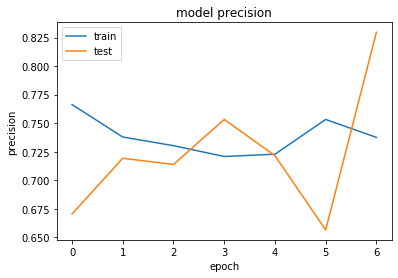

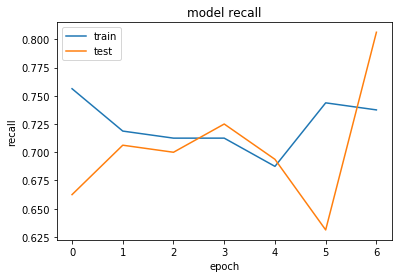

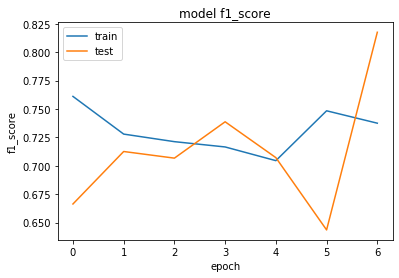

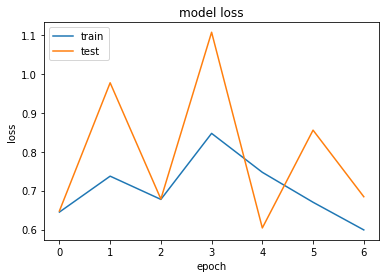

In [28]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**: Na primeira vez que rodamos o modelo com 10 camadas a convergência não foi tão boa e a precisão começou a cair a partir da sétima (7ª) camada, então resolvemos diminuir a quantidade de camadas para 7, o que resultou numa precisão muito boa e numa convergência um pouco melhor dos gráficos.

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

**Resposta**: Os valores da 7ª camada são os seguintes: precisão: 82,96% - sensibilidade: 80,62% - pontuação: 81,76%

### 4.5.3 Arquitetura VGG19

**Pergunta**: Explique como é constituída a arquitetura do VGG19? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**: É uma CNN de 19 camadas (16 camadas convolucionais e 3 camadas fully-connected). 
Ela possui uma arquitetura considerada simples para os padrões do Deep Learning, mas contém um número mostruoso de parâmetros: 143 milhões.
A diferença entre as arquiteturas VGG16 e VGG19 se resume a três camadas adicionais existentes na VGG19, sendo uma camada a mais no quarto, uma no quinto e uma no sexto bloco.

Um exemplo da arquitetura da VGG19 é a figura abaixo:

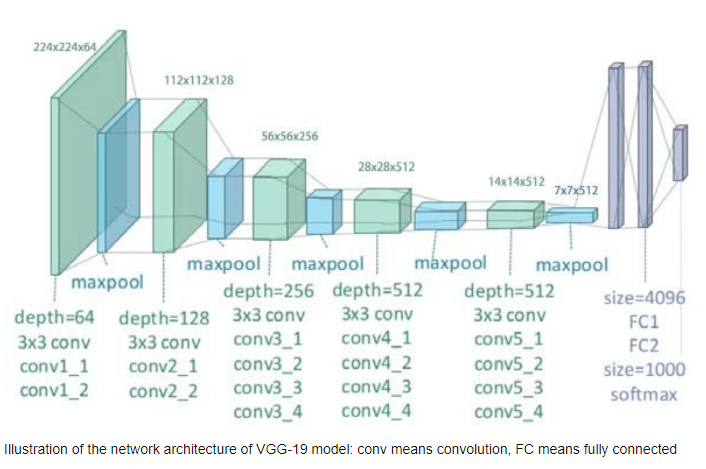

In [20]:
conv_base = VGG19(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

80142336/80134624 [==============================] - 152s 2us/step


In [21]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [22]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [23]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

Epoch 1/10
5/5 [==============================] - 264s 53s/step - loss: 3.3559 - precision_score: 0.4000 - recall_score: 0.3812 - f1_score: 0.3903 - val_loss: 1.6505 - val_precision_score: 0.4149 - val_recall_score: 0.4062 - val_f1_score: 0.4105
Epoch 2/10
5/5 [==============================] - 252s 50s/step - loss: 1.9515 - precision_score: 0.5071 - recall_score: 0.5000 - f1_score: 0.5034 - val_loss: 2.1807 - val_precision_score: 0.4239 - val_recall_score: 0.4000 - val_f1_score: 0.4116
Epoch 3/10
5/5 [==============================] - 252s 50s/step - loss: 1.3686 - precision_score: 0.5610 - recall_score: 0.5500 - f1_score: 0.5553 - val_loss: 1.5737 - val_precision_score: 0.5583 - val_recall_score: 0.5500 - val_f1_score: 0.5541
Epoch 4/10
5/5 [==============================] - 263s 53s/step - loss: 1.3936 - precision_score: 0.6264 - recall_score: 0.6187 - f1_score: 0.6225 - val_loss: 1.8147 - val_precision_score: 0.6585 - val_recall_score: 0.6375 - val_f1_score: 0.6478
Epoch 5/10
5/5 [

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

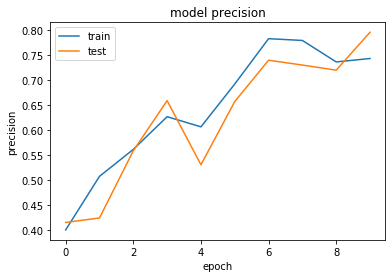

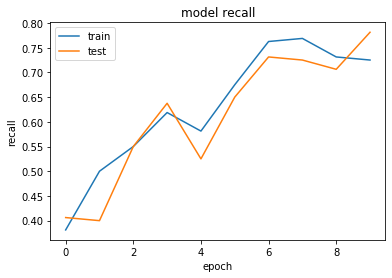

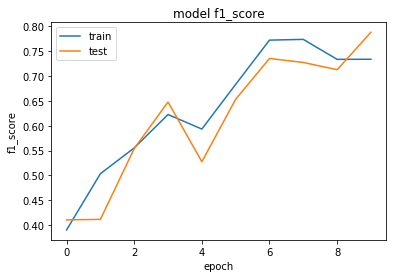

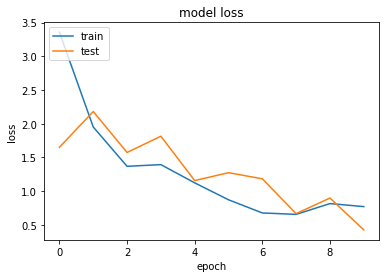

In [24]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**: A convergência destes gráficos talvez tenha sido a melhor dos 3 modelos e a pequena diferença nas "curvas" de "train" e "teste", mostram o quanto este modelo ficou ajustado para as imagens, suas quantidades e épocas processadas.

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

**Resposta**: Para a camada 10, os valores foram os seguintes: precisão: 79,52% - sensibilidade: 78,12% - pontuação: 78,81%.

## 4.6 Compartivo de arquiteturas

Preencha a tabela abaixo com os valores dos indicadores de performance apresentados.

_O cálculo do F1-Score é dado por 2 * (Precisão * Sensibilidade) / (Precisão + Sensibilidade)._

| Modelo   | Precisão (*Precision*) | Sensibilidade (*Recall*) | F1-Score |
|----------|----------|---------------|----------|
| ResNet50 | 78,70 %  | 61,87 %       | 69,28 %  |
| VGG16    | 82,96 %  | 80,62 %       | 81,78 %  |
| VGG19    | 79,52 %  | 78,12 %       | 78,81 %  |

## 4.7 Conclusões

Analise os resultados da tabela de indicadores do comparativo de arquiteturas e explique os principais motivos pelos quais cada modelo obteve cada resultado.

**Respota**: Obtivemos resultados muito bons com as 3 arquiteturas e verificamos que a ResNet50 e a VGG19 comportaram-se melhores com mais épocas (10) do que a VGG16, que começou a degradar a perfomance com mais épocas, por isso ajustamos ela pra apenas 7 épocas. 
Com base neste resultado, podemos concluir que as arquiteuras ResNet50 e VGG19 tem melhores resultados com mais épocas, ao contrário da VGG16, que comportou-se melhor com menos épocas.
Nas 3 arquiteturas, observamos que a quantidade de imagens influenciou bastante para o resultado final da acurácia, pois com menos imagens não conseguíamos alcançar os 70% mínimos que o professor estipulou.
Quanto ao indicativo de F1-Score, se ele servir de parâmetro, podemos dizer que a VGG16 saiu-se melhor que as outras e a ResNet50, pior, porém, ainda somos iniciantes nesta área e então, não podemos dizer só com base nele, que realmente as nossas conclusões podem servir de base para outros trabalhos.

## 4.8 Abordagem Extra

Considerando os outros classificadores, escolha outro que ainda não foi utilizado, implemente abaixo. Ao final compare os resultados e explique os resultados.

_Não se esquece de utilizar as importações adequadas para cada modelo.
A forma de implementação deve respeitar as mesmas condições como valor de split e quantidade de imagens para poder comparar os modelos._

In [9]:
#IMPLEMENTE
#Iremos testar inicialmente com a classe Xception

conv_base = Xception(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

In [10]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [11]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [12]:
qtde_epocas = 7

In [13]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)


Epoch 1/7
5/5 [==============================] - 214s 43s/step - loss: 1.0011 - precision_score: 0.5149 - recall_score: 0.3187 - f1_score: 0.3899 - val_loss: 19.3946 - val_precision_score: 0.2313 - val_recall_score: 0.2313 - val_f1_score: 0.2312
Epoch 2/7
5/5 [==============================] - 188s 38s/step - loss: 0.8580 - precision_score: 0.7203 - recall_score: 0.3875 - f1_score: 0.4800 - val_loss: 9.3603 - val_precision_score: 0.3712 - val_recall_score: 0.3688 - val_f1_score: 0.3699
Epoch 3/7
5/5 [==============================] - 187s 37s/step - loss: 0.7445 - precision_score: 0.8034 - recall_score: 0.5625 - f1_score: 0.6603 - val_loss: 11.3904 - val_precision_score: 0.3716 - val_recall_score: 0.3688 - val_f1_score: 0.3701
Epoch 4/7
5/5 [==============================] - 191s 38s/step - loss: 0.8239 - precision_score: 0.7100 - recall_score: 0.5875 - f1_score: 0.6428 - val_loss: 21.4838 - val_precision_score: 0.5063 - val_recall_score: 0.5063 - val_f1_score: 0.5062
Epoch 5/7
5/5 [=

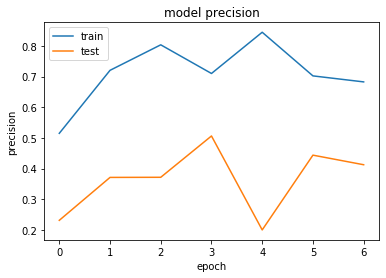

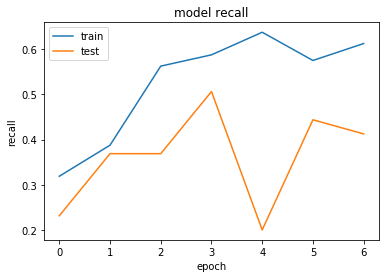

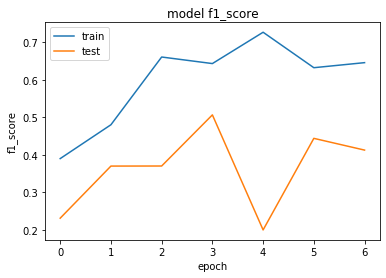

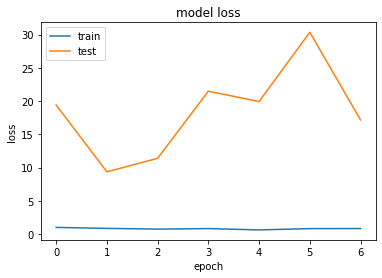

In [14]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
#Testamos uma abordagem extra com o classificador Xception, mas os resultados foram bem abaixo do esperado.
#Iremos agora testar com outros classificadores, começando pelo InceptionV3.

In [17]:
from keras.applications import InceptionV3


In [18]:
conv_base = InceptionV3(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False


87916544/87910968 [==============================] - 204s 2us/step


In [19]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, None, None, 3 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_5 (BatchNor (None, None, None, 3 96          conv2d_5[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_5[0][0]      
____________________________________________________________________________________________

In [20]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [21]:
qtde_epocas=7

In [22]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

Epoch 1/7
5/5 [==============================] - 92s 18s/step - loss: 1.3376 - precision_score: 0.5172 - recall_score: 0.4125 - f1_score: 0.4522 - val_loss: 16.9661 - val_precision_score: 0.4062 - val_recall_score: 0.4062 - val_f1_score: 0.4062
Epoch 2/7
5/5 [==============================] - 89s 18s/step - loss: 1.0776 - precision_score: 0.5354 - recall_score: 0.1875 - f1_score: 0.2683 - val_loss: 19.9834 - val_precision_score: 0.4563 - val_recall_score: 0.4563 - val_f1_score: 0.4562
Epoch 3/7
5/5 [==============================] - 82s 16s/step - loss: 0.9462 - precision_score: 0.6403 - recall_score: 0.4875 - f1_score: 0.5474 - val_loss: 4.4507 - val_precision_score: 0.4125 - val_recall_score: 0.4125 - val_f1_score: 0.4125
Epoch 4/7
5/5 [==============================] - 81s 16s/step - loss: 0.9563 - precision_score: 0.6651 - recall_score: 0.4187 - f1_score: 0.5099 - val_loss: 18.4230 - val_precision_score: 0.4437 - val_recall_score: 0.4437 - val_f1_score: 0.4437
Epoch 5/7
5/5 [======

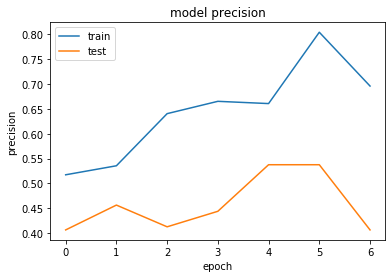

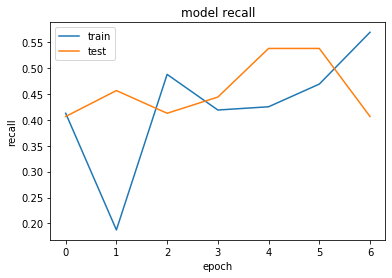

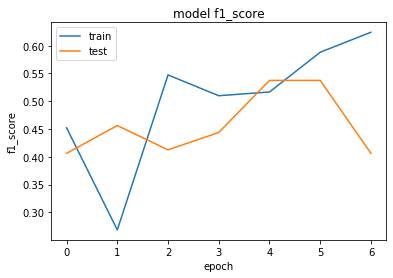

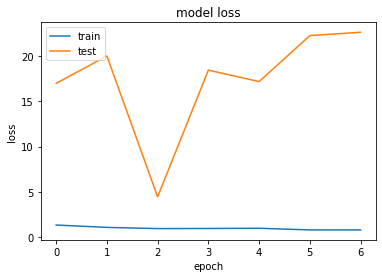

In [23]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
#também não conseguimos uma boa precisão com o classificador InceptionV3
#iremos então testar com o InceptionResNetV2

In [24]:
from keras.applications import InceptionResNetV2

In [26]:
conv_base = InceptionResNetV2(include_top=False)
for layer in conv_base.layers:
    layer.trainable = False

219062272/219055592 [==============================] - 268s 1us/step


In [27]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 
predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)
model.summary()


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_99 (Conv2D)              (None, None, None, 3 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_99 (BatchNo (None, None, None, 3 96          conv2d_99[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, None, None, 3 0           batch_normalization_99[0][0]     
____________________________________________________________________________________________

In [28]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)


Epoch 1/7
5/5 [==============================] - 172s 34s/step - loss: 1.2156 - precision_score: 0.5617 - recall_score: 0.1875 - f1_score: 0.2154 - val_loss: 306.6830 - val_precision_score: 0.3125 - val_recall_score: 0.3125 - val_f1_score: 0.3125
Epoch 2/7
5/5 [==============================] - 160s 32s/step - loss: 1.0752 - precision_score: 0.5379 - recall_score: 0.0938 - f1_score: 0.1582 - val_loss: 395.1146 - val_precision_score: 0.4563 - val_recall_score: 0.4563 - val_f1_score: 0.4562
Epoch 3/7
5/5 [==============================] - 153s 31s/step - loss: 0.9440 - precision_score: 0.6186 - recall_score: 0.4437 - f1_score: 0.5156 - val_loss: 144.1007 - val_precision_score: 0.5312 - val_recall_score: 0.5312 - val_f1_score: 0.5312
Epoch 4/7
5/5 [==============================] - 152s 30s/step - loss: 0.8184 - precision_score: 0.7200 - recall_score: 0.5500 - f1_score: 0.6232 - val_loss: 319.1246 - val_precision_score: 0.4437 - val_recall_score: 0.4437 - val_f1_score: 0.4437
Epoch 5/7
5/

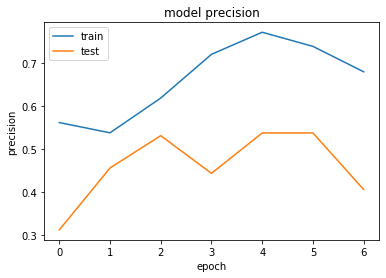

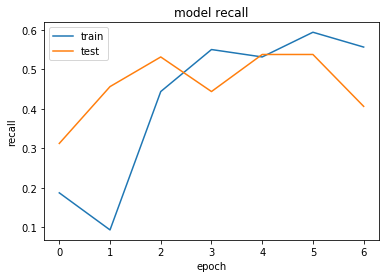

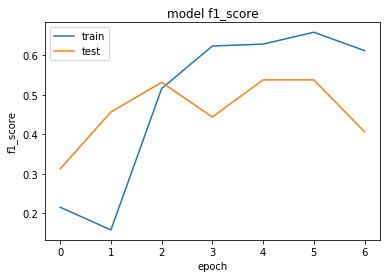

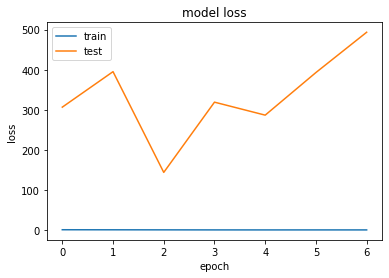

In [29]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [30]:
#também não conseguimos uma boa precisão com o classificador InceptionResNetV2
#iremos então testar com o MobileNet

In [31]:
from keras.applications import MobileNet

In [32]:
conv_base = MobileNet(include_top=False)
for layer in conv_base.layers:
    layer.trainable = False

C:\Users\Infotecno\anaconda3\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


17227776/17225924 [==============================] - 72s 4us/step


In [33]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 
predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128 

In [34]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

Epoch 1/7
5/5 [==============================] - 86s 17s/step - loss: 1.2989 - precision_score: 0.5127 - recall_score: 0.4000 - f1_score: 0.4468 - val_loss: 1.6535 - val_precision_score: 0.3244 - val_recall_score: 0.3187 - val_f1_score: 0.3215
Epoch 2/7
5/5 [==============================] - 72s 14s/step - loss: 0.7009 - precision_score: 0.7836 - recall_score: 0.6750 - f1_score: 0.7250 - val_loss: 1.2168 - val_precision_score: 0.5891 - val_recall_score: 0.3938 - val_f1_score: 0.4712
Epoch 3/7
5/5 [==============================] - 71s 14s/step - loss: 0.6835 - precision_score: 0.7401 - recall_score: 0.6562 - f1_score: 0.6951 - val_loss: 1.0278 - val_precision_score: 0.3828 - val_recall_score: 0.2000 - val_f1_score: 0.2616
Epoch 4/7
5/5 [==============================] - 71s 14s/step - loss: 0.7798 - precision_score: 0.7113 - recall_score: 0.6750 - f1_score: 0.6925 - val_loss: 1.1363 - val_precision_score: 0.3444 - val_recall_score: 0.1000 - val_f1_score: 0.1546
Epoch 5/7
5/5 [=========

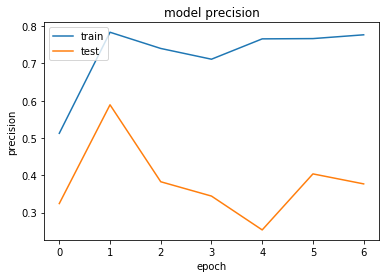

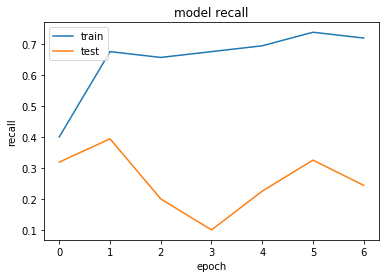

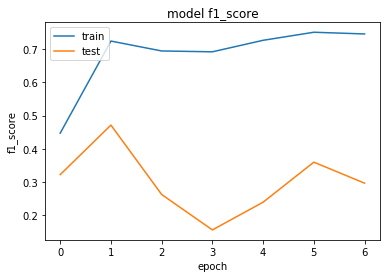

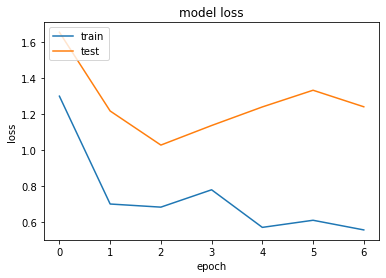

In [35]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
#também não conseguimos uma boa precisão com o classificador MobileNet
#iremos então testar com o DenseNet121

In [37]:
from keras.applications import DenseNet121

In [38]:
conv_base = DenseNet121(include_top=False)
for layer in conv_base.layers:
    layer.trainable = False

29089792/29084464 [==============================] - 47s 2us/step


In [39]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 
predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, None, None, 3 0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, None, None, 6 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, None, None, 6 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [40]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

Epoch 1/7
5/5 [==============================] - 263s 53s/step - loss: 1.1079 - precision_score: 0.5168 - recall_score: 0.3688 - f1_score: 0.4213 - val_loss: 1.7331 - val_precision_score: 0.3553 - val_recall_score: 0.3187 - val_f1_score: 0.3356
Epoch 2/7
5/5 [==============================] - 211s 42s/step - loss: 0.8460 - precision_score: 0.7461 - recall_score: 0.5562 - f1_score: 0.6365 - val_loss: 2.4838 - val_precision_score: 0.3294 - val_recall_score: 0.3250 - val_f1_score: 0.3272
Epoch 3/7
5/5 [==============================] - 210s 42s/step - loss: 0.6995 - precision_score: 0.7439 - recall_score: 0.5813 - f1_score: 0.6517 - val_loss: 2.2119 - val_precision_score: 0.2315 - val_recall_score: 0.2188 - val_f1_score: 0.2249
Epoch 4/7
5/5 [==============================] - 209s 42s/step - loss: 0.6116 - precision_score: 0.8211 - recall_score: 0.7000 - f1_score: 0.7552 - val_loss: 3.9192 - val_precision_score: 0.2750 - val_recall_score: 0.2750 - val_f1_score: 0.2750
Epoch 5/7
5/5 [=====

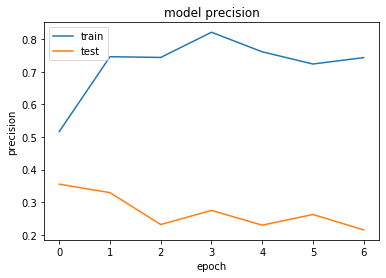

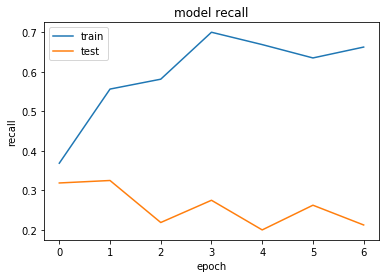

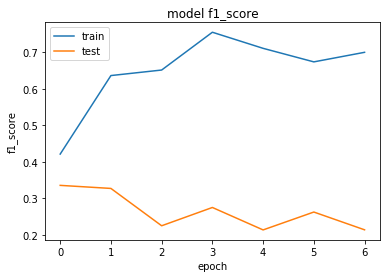

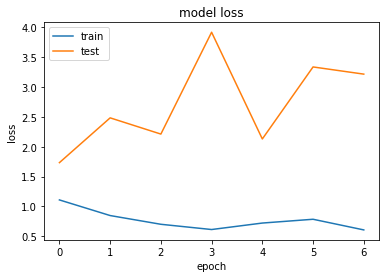

In [41]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [16]:
#também não conseguimos uma boa precisão com o classificador DenseNet121
#iremos então testar com o NASNetMobile

In [17]:
from keras.applications import NASNetMobile

In [18]:
conv_base = NASNetMobile(include_top=False)
for layer in conv_base.layers:
    layer.trainable = False


19996672/19993432 [==============================] - 26s 1us/step


In [19]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 
predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 111, 111, 32) 128         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 111, 111, 32) 0           stem_bn1[0][0]                   
____________________________________________________________________________________________

In [20]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

Epoch 1/7
5/5 [==============================] - 86s 17s/step - loss: 1.1237 - precision_score: 0.4745 - recall_score: 0.4000 - f1_score: 0.4288 - val_loss: 18.9772 - val_precision_score: 0.2937 - val_recall_score: 0.2937 - val_f1_score: 0.2937
Epoch 2/7
5/5 [==============================] - 66s 13s/step - loss: 0.9585 - precision_score: 0.6215 - recall_score: 0.3750 - f1_score: 0.4610 - val_loss: 15.6092 - val_precision_score: 0.3063 - val_recall_score: 0.3063 - val_f1_score: 0.3062
Epoch 3/7
5/5 [==============================] - 68s 14s/step - loss: 0.9327 - precision_score: 0.6345 - recall_score: 0.4375 - f1_score: 0.5156 - val_loss: 15.3227 - val_precision_score: 0.2562 - val_recall_score: 0.2562 - val_f1_score: 0.2562
Epoch 4/7
5/5 [==============================] - 68s 14s/step - loss: 0.8247 - precision_score: 0.6754 - recall_score: 0.5437 - f1_score: 0.6022 - val_loss: 14.8607 - val_precision_score: 0.2812 - val_recall_score: 0.2812 - val_f1_score: 0.2812
Epoch 5/7
5/5 [=====

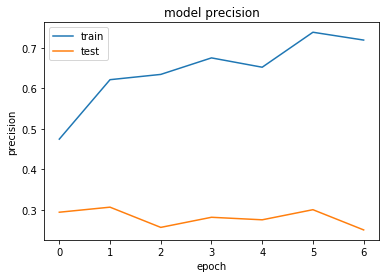

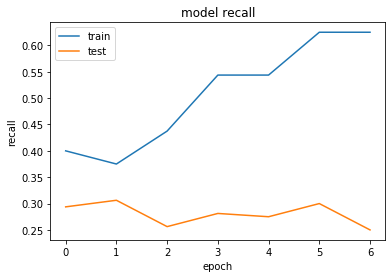

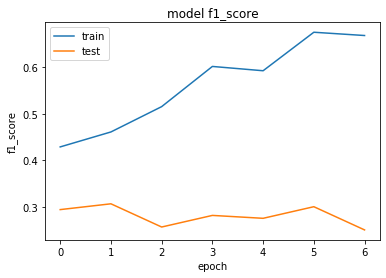

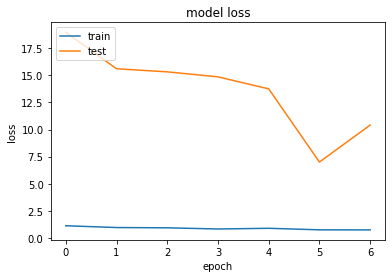

In [21]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [22]:
#também não conseguimos uma boa precisão com o classificador NASNetMobile
#iremos então testar com o ResNet50V2

In [30]:
from keras.applications import ResNet50V2

In [34]:
conv_base = ResNet50V2(include_top=False)
for layer in conv_base.layers:
    layer.trainable = False

In [36]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 
predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, None, None, 6 0           conv1_conv[0][0]                 
____________________________________________________________________________________________

In [37]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

Epoch 1/7
5/5 [==============================] - 157s 31s/step - loss: 1.0130 - precision_score: 0.5180 - recall_score: 0.3125 - f1_score: 0.3892 - val_loss: 95.2435 - val_precision_score: 0.2937 - val_recall_score: 0.2937 - val_f1_score: 0.2937
Epoch 2/7
5/5 [==============================] - 141s 28s/step - loss: 0.7721 - precision_score: 0.7286 - recall_score: 0.5500 - f1_score: 0.6238 - val_loss: 151.6173 - val_precision_score: 0.1688 - val_recall_score: 0.1688 - val_f1_score: 0.1687
Epoch 3/7
5/5 [==============================] - 140s 28s/step - loss: 0.6354 - precision_score: 0.7821 - recall_score: 0.6750 - f1_score: 0.7240 - val_loss: 159.3261 - val_precision_score: 0.2750 - val_recall_score: 0.2750 - val_f1_score: 0.2750
Epoch 4/7
5/5 [==============================] - 150s 30s/step - loss: 0.5965 - precision_score: 0.7993 - recall_score: 0.7375 - f1_score: 0.7667 - val_loss: 209.5939 - val_precision_score: 0.2375 - val_recall_score: 0.2375 - val_f1_score: 0.2375
Epoch 5/7
5/5

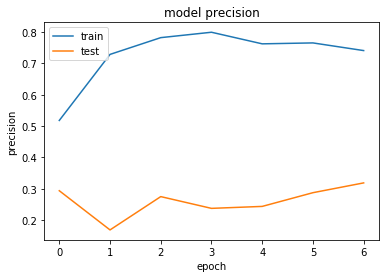

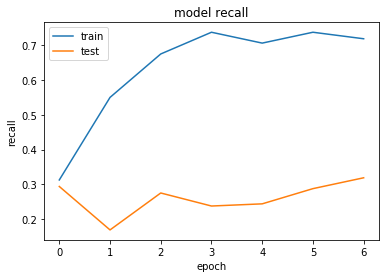

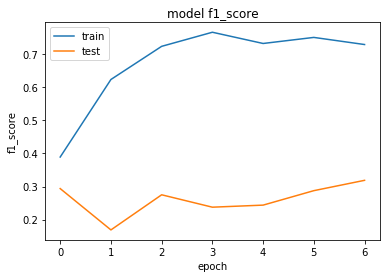

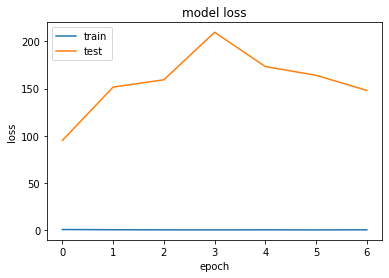

In [38]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
#também não conseguimos uma boa precisão com o classificador ResNet50V2

### 4.8.1 Conclusões sobre a abordagem extra

Como seu modelo performou em comparação com os demais modelos anteriores? Justifique sua resposta levando em consideração a arquitetura respectiva.

**Resposta**: Fizemos testes com 6 diferentes arquiteturas. Os resultados encontrados foram valores bem abaixo das 3 arquiteturas anteriormente utilizadas. Pela documentação do Keras, reparamos que tanto a VGG16, como a VGG19 tem uma quantidade de parâmetros bem maiores do que as outras, porém, a ResNet50 até que tem uma quantidade de parâmetros próximas às outras arquiteturas, assim como valores de acurácias semelhantes, mas mesmo assim, os resultados ficaram bem aquém do obtidos anteriormente. A conclusão que tiramos de tudo isso é que ou fizemos algo errado ou então, estas outras arquiteturas não são especialistas em trabalhar com imagens, tanto quanto as 3 anteriores.

| Modelo           | Precisão (*Precision*) | Sensibilidade (*Recall*) | F1-Score |
|------------------|----------|---------------|----------|
| ResNet50         | 78,70 %  | 61,87 %       | 69,28 %  |
| VGG16            | 82,96 %  | 80,62 %       | 81,78 %  |
| VGG19            | 79,52 %  | 78,12 %       | 78,81 %  |
| Xception         | 41,25 %  | 41,25 %       | 41,25 %  |
| InceptionV3      | 40,62 %  | 40,62 %       | 40,62 %  |
| InceptionResNetV2| 40,62 %  | 40,62 %       | 40,62 %  |
| MobileNet        | 37,71 %  | 24,38 %       | 29,58 %  |
| DenseNet121      | 21,51 %  | 21,25 %       | 21,38 %  |
| NASNetMobile     | 25,00 %  | 25,00 %       | 25,00 %  |
| ResNet50V2       | 31,87 %  | 31,87 %       | 31,87 %  |


In [46]:
#Professor Michel, muito obrigado pelas suas aulas, pelas suas excelentes explicações e por todo aprendizado 
#que nos proporcionou.